In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

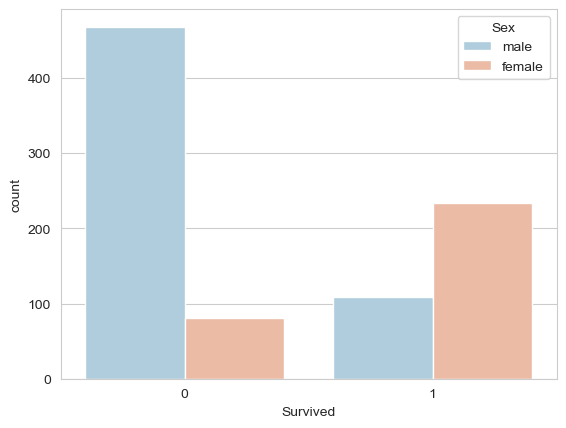

In [5]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

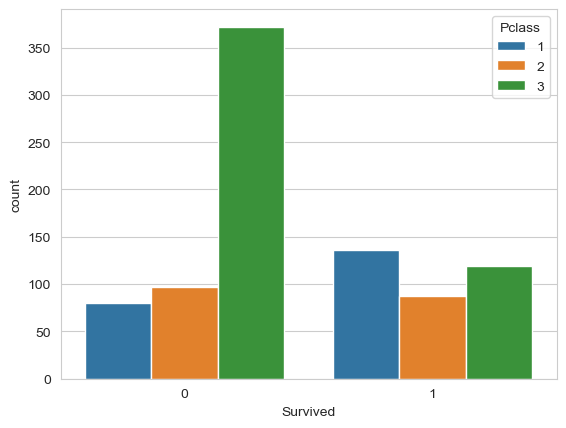

In [6]:
sns.countplot(x='Survived', hue='Pclass',data=train)

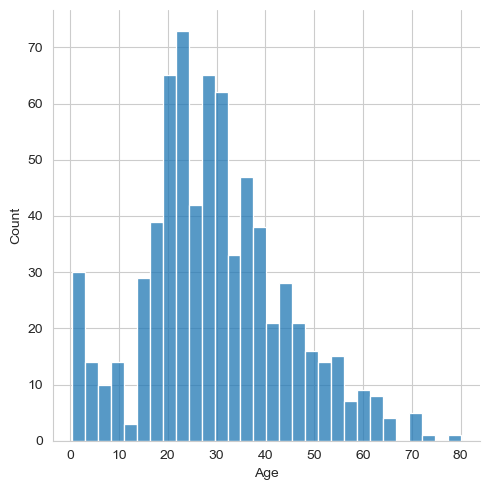

In [7]:
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

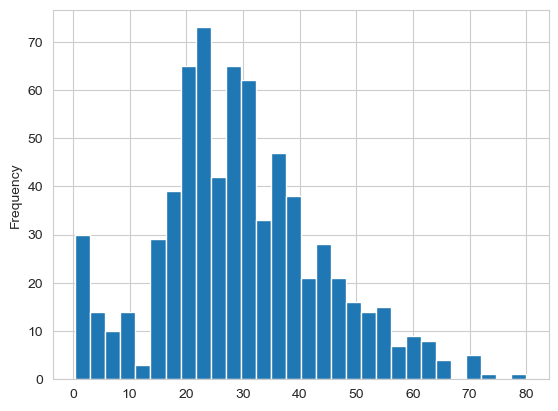

In [8]:
train['Age'].plot.hist(bins=30)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

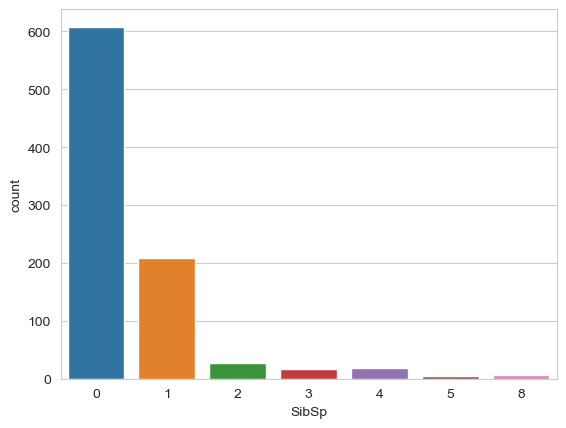

In [10]:
sns.countplot(data=train, x='SibSp')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

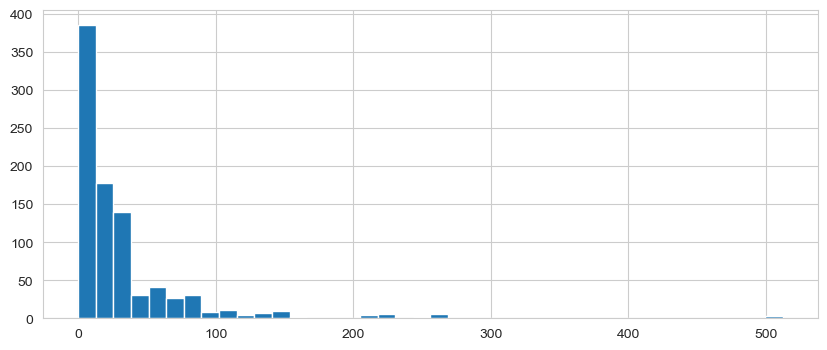

In [12]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [13]:
import cufflinks as cf # onödig skit som gör att grafer är interaktiva.

In [14]:
cf.go_offline()

In [15]:
#train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:>

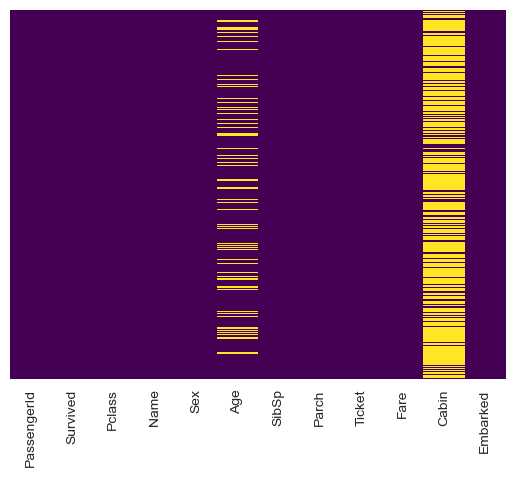

In [16]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

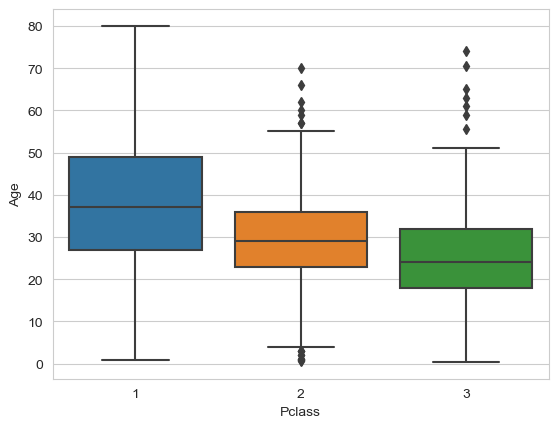

In [17]:
sns.boxplot(x='Pclass',y='Age', data=train)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train = pd.read_csv('titanic_train.csv')



def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 27
        else:
            return 25
    else:
        return age
    

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop(labels='Cabin',inplace=True, axis=1)
train.dropna(inplace=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket'], inplace=True, axis=1)
train.drop('PassengerId', axis=1,inplace=True)
X = train.drop('Survived',axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [7]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

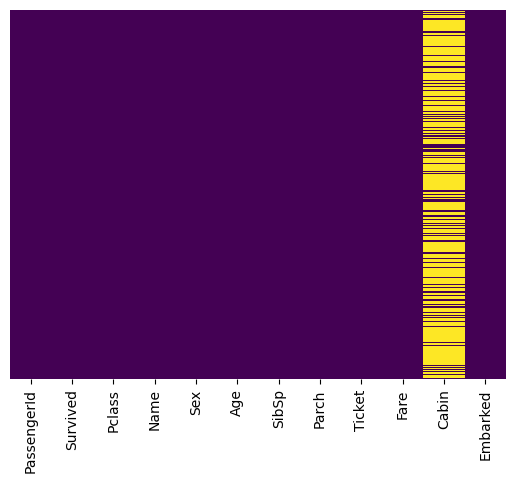

In [8]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.drop(labels='Cabin',inplace=True, axis=1)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
train.dropna(inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [125]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [126]:
train = pd.concat([train,sex,embark],axis=1)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [128]:
train.drop(['Sex','Embarked','Name','Ticket'], inplace=True, axis=1)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [130]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.00000,0,0,13.00,1,0,1
887,888,1,1,19.00000,0,0,30.00,0,0,1
888,889,0,3,25.14062,1,2,23.45,0,0,1
889,890,1,1,26.00000,0,0,30.00,1,0,0
890,891,0,3,32.00000,0,0,7.75,1,1,0


In [131]:
train.drop('PassengerId', axis=1,inplace=True)

In [132]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [133]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
log_model = LogisticRegression(max_iter=1000)

In [138]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [139]:
predictions = log_model.predict(X_test)

In [140]:
from sklearn.metrics import classification_report

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 31,  73]])

In [87]:
train = pd.read_csv('titanic_train.csv')

<AxesSubplot:>

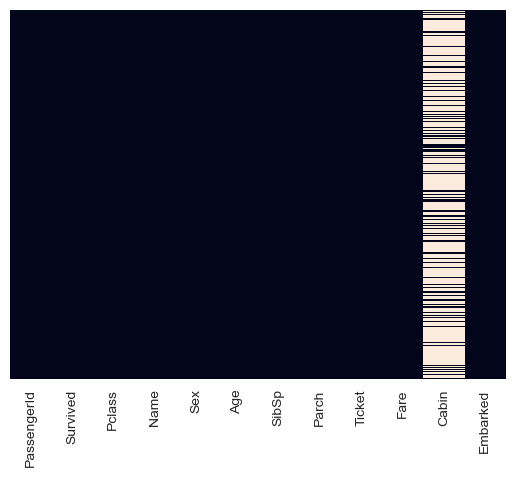

In [89]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

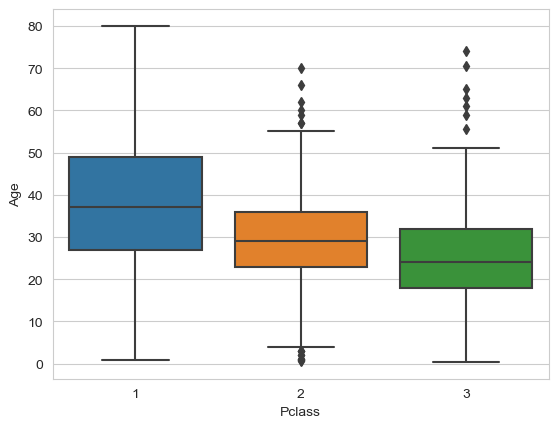

In [73]:
sns.boxplot(data=train, x='Pclass',y='Age')

In [86]:
test = train.groupby(['Pclass']).mean()['Age'].to_dict()

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data cleaning.

def impute_age_udemy(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 27
        else:
            return 25
    else:
        return age
    
    

# Modify impute_age to accept the test dictionary
def impute_age(cols, test):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        return test.get(pclass, age)  # Use test dictionary
    else:
        return age

    

#read_data
data = pd.read_csv('titanic_train.csv')    
    
# create a dict = {Pclass : average_age}
test = data.groupby(['Pclass']).mean()['Age'].to_dict()

# set the missing ages to average age of the passengers pclass
# data['Age'] = data[['Age', 'Pclass']].apply(lambda row: impute_age(row, test), axis=1)

# alternative way
data['Age'] = data[['Age', 'Pclass']].apply(impute_age_udemy, axis=1)
data.drop('Cabin',inplace=True,axis=1)

data.dropna(inplace=True)

#create dummies of catagory-type rows 
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)
pclass.columns =['pclass 2','pclass 3']
# add numerical cols
data = pd.concat([data,sex,embark,pclass], axis=1)
#drop useless cols
data.drop(labels=['Name','Ticket','Sex','Embarked','PassengerId','Pclass'],inplace=True, axis=1)




# logistic regression
X = data.drop(labels='Survived', axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

    

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [159]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
#read_data
data = pd.read_csv('titanic_train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#read_data
data = pd.read_csv('titanic_train.csv')    
    
# create a dict = {Pclass : average_age}
test = data.groupby(['Pclass']).mean()['Age'].to_dict()

# set the missing ages to average age of the passengers pclass
# data['Age'] = data[['Age', 'Pclass']].apply(lambda row: impute_age(row, test), axis=1)

# alternative way
data['Age'] = data[['Age', 'Pclass']].apply(impute_age_udemy, axis=1)
data.drop('Cabin',inplace=True,axis=1)

data.dropna(inplace=True)

#create dummies of catagory-type rows 
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)
pclass.columns =['pclass 2','pclass 3'] 

# add numerical cols
data = pd.concat([data,sex,embark,pclass], axis=1)
#drop useless cols
data.drop(labels=['Name','Ticket','Sex','Embarked','PassengerId','Pclass'],inplace=True, axis=1)

In [27]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
pclass.columns =['stirng','stringwer'] 

In [30]:
pclass

,stirng,stringwer
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0
